# SimpleRNN Test Code

In [ ]:
import warnings
warnings.filterwarnings('ignore')

> ## Import Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# I. SimpleRNN - without Normalization

> ## 1) Sample Data

* Inputs 데이터 생성(100, 5, 1)

In [ ]:
X = [[[i + j] for i in range(5)] for j in range(100)]

X[:3], X[-3:]

([[[0], [1], [2], [3], [4]],
  [[1], [2], [3], [4], [5]],
  [[2], [3], [4], [5], [6]]],
 [[[97], [98], [99], [100], [101]],
  [[98], [99], [100], [101], [102]],
  [[99], [100], [101], [102], [103]]])

* Outputs 데이터 생성(100, 1)

In [ ]:
y = [(i + 5) for i in range(100)]

y[:3], y[-3:]

([5, 6, 7], [102, 103, 104])

> ## 2) numpy_Array Casting

In [ ]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

> ## 3) Train vs. Test Split

* 80:20

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 4) Keras SimpleRNN Modeling

### (1) Model Define & Summary
* Unit(output_dim) : 3
* input_shape(input_lenght, input_dim) : (5, 1)
* return_sequences = False : 최종 Unit만 출력
* layers.Dense(1) : y_hat


In [ ]:
from keras import models, layers

model_1 = models.Sequential(name = 'SimpleRNN_1')
model_1.add(layers.SimpleRNN(3,
                             input_shape = (5, 1), 
                             return_sequences = False))
model_1.add(layers.Dense(1))

model_1.summary()

Model: "SimpleRNN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 15        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


### (2) Model Compile

In [ ]:
model_1.compile(loss = 'mse', 
                optimizer = 'adam', 
                metrics = ['accuracy'])

### (3) Model Fit

In [ ]:
Hist_1 = model_1.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 2s 66ms/step - loss: 3771.1037 - accuracy: 0.0000e+00 - val_loss: 3617.6008 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 4158.5260 - accuracy: 0.0000e+00 - val_loss: 3613.3821 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 3256.8952 - accuracy: 0.0000e+00 - val_loss: 3609.2993 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 3651.1507 - accuracy: 0.0000e+00 - val_loss: 3605.0864 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 3381.0730 - accuracy: 0.0000e+00 - val_loss: 3600.9153 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 3272.0091 - accuracy: 0.0000e+00 - val_loss: 3596.6887 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - lo

### (4) Model Predict

In [ ]:
y_hat = model_1.predict(X_test)

### (5) 학습 결과 시각화

* Loss 감소

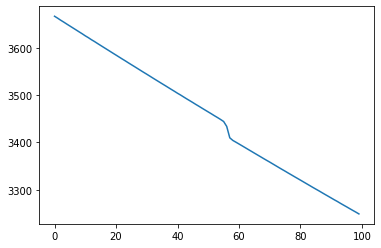

In [ ]:
plt.plot(Hist_1.history['loss'])
plt.show()

* 학습 되지 않음
 * 녹색 -> 정답(y_test)
 * 적색 -> 예측(y_hat)

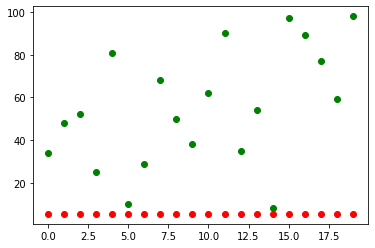

In [ ]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# II. SimpleRNN - with Normalization

> ## 1) Sample Data - with Normalization

In [ ]:
X = [[[(i + j)] for i in range(5)] for j in range(100)]
y = [(i + 5) for i in range(100)]

X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

> ## 2) Casting

In [ ]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

> ## 3) Train vs. Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 4) Keras SimpleRNN Modeling

### (1) Model Define & Summary
* None : input_length 자동 맞춤


In [ ]:
model_2 = models.Sequential(name = 'SimpleRNN_2')
model_2.add(layers.SimpleRNN(3,
                             input_shape = (None, 1), 
                             return_sequences = False))
model_2.add(layers.Dense(1))

model_2.summary()

Model: "SimpleRNN_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


### (2) Model Compile

In [ ]:
model_2.compile(loss = 'mse', 
                optimizer = 'adam', 
                metrics = ['accuracy'])

### (3) Model Fit

In [ ]:
Hist_2 = model_2.fit(X_train, y_train, 
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 33ms/step - loss: 1.4820 - accuracy: 0.0107 - val_loss: 1.2812 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 1.2164 - accuracy: 0.0231 - val_loss: 1.1179 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 1.0152 - accuracy: 0.0107 - val_loss: 0.9876 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.9643 - accuracy: 0.0050 - val_loss: 0.8754 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.9634 - accuracy: 0.0085 - val_loss: 0.7815 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6681 - accuracy: 0.0085 - val_loss: 0.7019 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6856 - accuracy: 0.0174 - val_loss: 0.6299 - val_accur

### (4) Model Predict

In [ ]:
y_hat = model_2.predict(X_test)

### (5) 학습 결과 시각화

* Loss 감소

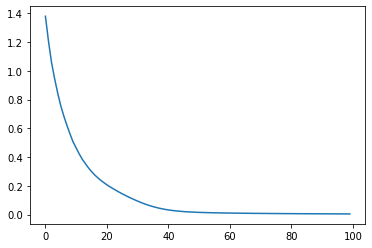

In [ ]:
plt.plot(Hist_2.history['loss'])
plt.show()

* 학습 진행
 * 녹색 -> 정답(y_test)
 * 적색 -> 예측(y_hat)

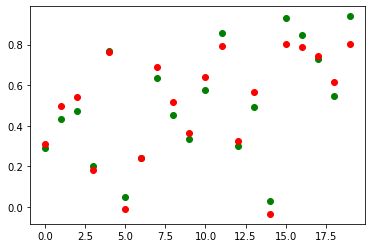

In [ ]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# III. Stacked_SimpleRNN

> ## 1) Model Define & Summary

* return_sequences = True

In [ ]:
model_3 = models.Sequential(name = 'Stackd_RNN')
model_3.add(layers.SimpleRNN(3,
                             input_shape = (None, 1), 
                             return_sequences = True))
model_3.add(layers.SimpleRNN(3,
                             input_shape = (None, 1),
                             return_sequences = False))
model_3.add(layers.Dense(1))

model_3.summary()

Model: "Stackd_RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, None, 3)           15        
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

In [ ]:
model_3.compile(loss = 'mse', 
                optimizer = 'adam', 
                metrics = ['accuracy'])

> ## 3) Model Fit

In [ ]:
Hist_3 = model_3.fit(X_train, y_train, 
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 2s 45ms/step - loss: 0.0053 - accuracy: 0.0221 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0040 - accuracy: 0.0151 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0035 - accuracy: 0.0107 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.0151 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.0258 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0031 - accuracy: 0.0130 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0024 - accuracy: 0.0159 - val_loss: 0.0020 - val_accur

> ## 4) Model Predict

In [ ]:
y_hat = model_3.predict(X_test)

> ## 5) 학습 결과 시각화

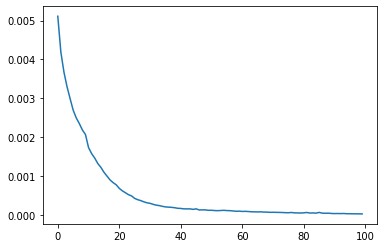

In [ ]:
plt.plot(Hist_3.history['loss'])
plt.show()

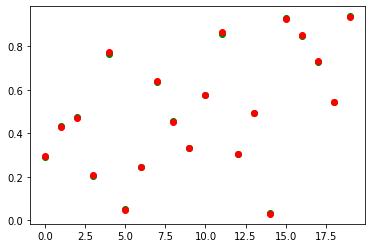

In [ ]:
plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

# IV. 'return_sequences' Output_Options

* 'input_length'에 대한 Sequance 전체를 출력할지 설정
 - 'False' vs. 'True'

> ## 1) 실습데이터 생성

In [ ]:
X = [[[i + j] for i in range(5)] for j in range(100)]
y = [i + 5 for i in range(100)]

In [ ]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 2) 테스트용 Input Data

In [ ]:
X_test[0].reshape(1, 5, 1)

array([[[29.],
        [30.],
        [31.],
        [32.],
        [33.]]])

> ## 3) False_Option

* 마지막 Output만 출력
 * Unit -> 1

In [ ]:
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(1,
                                 input_shape = (5, 1), 
                                 return_sequences = False))

Model_False.compile(loss = 'mse',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

In [ ]:
Model_False.predict(X_test[0].reshape(1, 5, 1))

array([[1.]], dtype=float32)

* 마지막 Output만 출력
 * Unit -> 3

In [ ]:
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(3,
                                 input_shape = (5, 1), 
                                 return_sequences = False))

Model_False.compile(loss = 'mse',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

In [ ]:
Model_False.predict(X_test[0].reshape(1, 5, 1))

array([[-1., -1.,  1.]], dtype=float32)

> ## 4) True_Option

* 매 순환마다 Output 출력
 * Unit -> 1
 * input_length -> 5

In [ ]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(1,
                                input_shape = (5, 1), 
                                return_sequences = True))

Model_True.compile(loss = 'mse',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

In [ ]:
Model_True.predict(X_test[0].reshape(1, 5, 1))

array([[[-0.99607813],
        [-0.9770283 ],
        [-0.98211753],
        [-0.98540395],
        [-0.9881328 ]]], dtype=float32)

* 매 순환마다 Output만 출력
 * Unit -> 3
 * input_length -> 5

In [ ]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(3,
                                input_shape = (5, 1), 
                                return_sequences = True))

Model_True.compile(loss = 'mse',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

In [ ]:
Model_True.predict(X_test[0].reshape(1, 5, 1))

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

# 
# 
# 
# The End
# 
# 
# 